<a href="https://colab.research.google.com/github/Preet-tech07/Classification-Machine-Learning/blob/main/Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deal with Imbalanced Dataset**

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df['Gender'].value_counts()

,count
Gender,
Female,204
Male,196


In [6]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


0->257

1->143

Imbalanced dataset

Purchased    0   1
Gender            
Female     127  77
Male       130  66


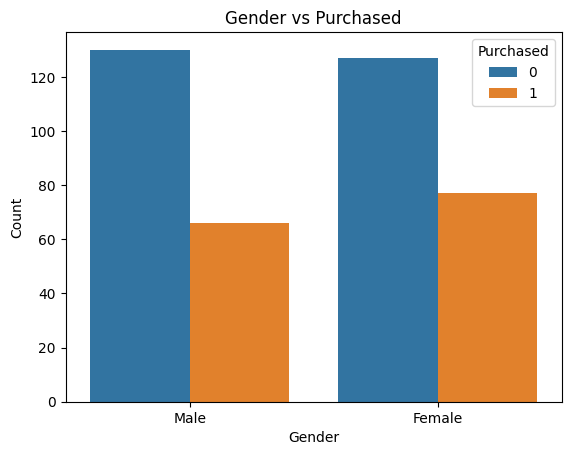

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a cross-tab (Gender vs Purchased)
gender_purchased = pd.crosstab(df['Gender'], df['Purchased'])
print(gender_purchased)

# Plot the table as a bar chart
sns.countplot(x="Gender", hue="Purchased", data=df)
plt.title("Gender vs Purchased")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [8]:
df.drop(['User ID','Gender'],axis=1,inplace=True)


In [9]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
lr.score(x_test,y_test)*100

88.75

In [14]:
lr.predict([[19,19000]])

array([0])

In [15]:
df[df['Purchased'] == 1].head()


,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1


In [16]:
lr.predict([[47,25000]])

array([0])

In [17]:
lr.predict([[45,26000]])

array([0])

You can see that it is predicting 0 but originally it is 1

It is because in this dataset [count of Zero>count of 1] that's why prediction is bias towards zero

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
ru=RandomUnderSampler()
ru_x,ru_y=ru.fit_resample(x,y)

In [20]:
ru_x

,Age,EstimatedSalary
30,31,74000
236,40,57000
174,34,72000
254,50,44000
77,22,27000
...,...,...
393,60,42000
395,46,41000
396,51,23000
397,50,20000


In [21]:
ru_y

,Purchased
30,0
236,0
174,0
254,0
77,0
...,...
393,1
395,1
396,1
397,1


In [22]:
ru_y.value_counts()

,count
Purchased,
0,143
1,143


In [23]:
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y,test_size=0.2,random_state=42)

In [24]:
lr1=LogisticRegression()
lr1.fit(x_train,y_train)

LogisticRegression()

In [25]:
lr1.score(x_test,y_test)*100

74.13793103448276

In [27]:
lr.predict([[46,280001]])

array([1])

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
ro=RandomOverSampler()
ro_x,ro_y=ro.fit_resample(x,y)

In [30]:
ro_y.value_counts()

,count
Purchased,
0,257
1,257


In [31]:
x_train1,x_test1,y_train1,y_test1=train_test_split(ro_x,ro_y,test_size=0.2,random_state=42)

In [32]:
lr2=LogisticRegression()
lr2.fit(x_train1,y_train1)

LogisticRegression()

In [33]:
lr2.score(x_test1,y_test1)*100

85.43689320388349

In [35]:
lr2.predict([[47,25000]])

array([1])